# CS6140 Machine Learning: Assignment 4 (F22) (Total Points: 100)
## Prof. Ahmad Uzair

In [107]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import KFold

## 3. Gaussian Mixture Model (GMM) [30 Points]

## True Data Generation Instructions

Select a Gaussian Mixture Model as the true probability density function for 2-dimensional real-valued data synthesis. This GMM will have 4 components with different mean vectors, different covariance matrices, and different probability for each Gaussian to be selected as the generator for each sample.

Generate two data sets with independent identically distributed samples using this true GMM; these datasets will have 100 and 10000 samples respectively.

Note: You may use any library of your choice for all aspects of this question

In [108]:
# Example parameter values you may use to generate data
mu_true = np.array([[3, 0], [0, 3], [-1, -2], [1, 7]])
sigma_true = np.array([[[1, 0], [0, 1]],
                       [[1, 0], [0, 1.5]],
                       [[1, 0], [0, 0.5]],
                       [[0.5, 0], [0, 1]]])
weights_true = np.array([0.25, 0.2, 0.32, 0.23])
acc_weights = [np.sum(weights_true[: i]) for i in range(1, len(weights_true) + 1)]

In [109]:
# Generate samples
X_100, X_10000 = [], []

for sz in [100, 10000]:
    data_labels = np.random.choice(4, sz, replace = True, p = weights_true)
    component_amount = []
    for i in range(len(weights_true)):
        label_amount = np.array(((data_labels == i).nonzero())[0])
        # component_amount.append(len(label_amount))
        component_amount.append(label_amount)

    # print(f'Number of Labels: {component_amount}')
    print(f'Number of Labels: {[len(i) for i in component_amount]}')

    for i in range(len(weights_true)):
        # x0, x1 = np.random.multivariate_normal(mu_true[i], sigma_true[i], component_amount[i]).T
        x0, x1 = np.random.multivariate_normal(mu_true[i], sigma_true[i], len(component_amount[i])).T
        if sz == 100:
            X_100 += list([fst, snd] for fst, snd in zip(x0, x1))
        else:
            X_10000 += list([fst, snd] for fst, snd in zip(x0, x1))

X_100 = np.array(X_100)
X_10000 = np.array(X_10000)

Number of Labels: [25, 26, 27, 22]
Number of Labels: [2484, 2052, 3124, 2340]


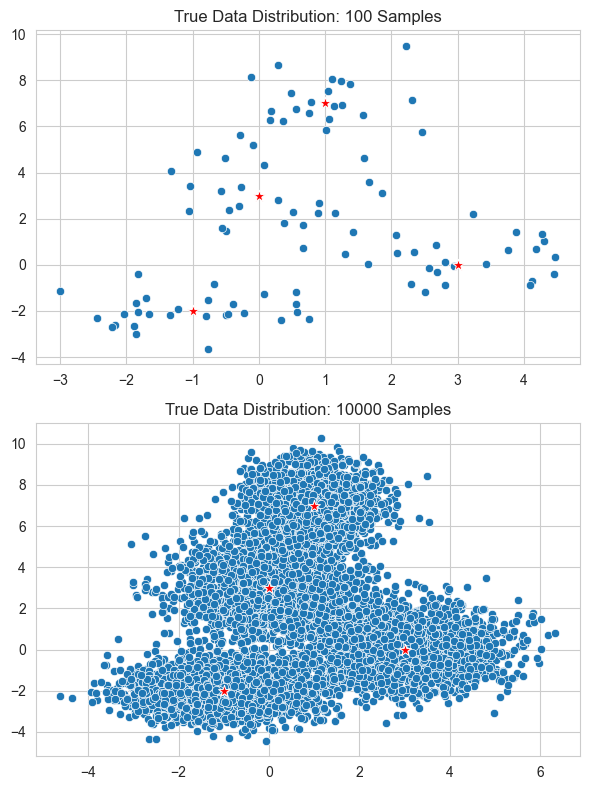

In [110]:
fig_1 = plt.figure(figsize = (6, 8))

plt.subplot(2, 1, 1)
sns.scatterplot(x = X_100.T[0], y = X_100.T[1])
# sns.scatterplot(x = gmm_100.means_.T[0], y = gmm_100.means_.T[1], s = 80, marker = '*', color = 'r')
sns.scatterplot(x = mu_true.T[0], y = mu_true.T[1], s = 80, marker = '*', color = 'r')
plt.title('True Data Distribution: 100 Samples')

plt.subplot(2, 1, 2)
sns.scatterplot(x = X_10000.T[0], y = X_10000.T[1])
# sns.scatterplot(x = gmm_10000.means_.T[0], y = gmm_10000.means_.T[1], s = 80, marker = '*', color = 'r')
sns.scatterplot(x = mu_true.T[0], y = mu_true.T[1], s = 80, marker = '*', color = 'r')
plt.title('True Data Distribution: 10000 Samples')

fig_1.tight_layout()
plt.show()

# Model Order Selection Using Cross-Validation
For each data set, using maximum likelihood parameter estimation principle (e.g. with the EM algorithm), within the framework of K-fold (e.g., 10-fold) cross-validation, evaluate GMMs with different model orders; specifically evaluate candidate GMMs with 1, 2, 3, 4, 5, 6, 7 Gaussian components. Note that both model parameter estimation and validation performance measures to be used is log-likelihood of data.

Repeat the experiment multiple times (e.g., at least 30 times) and report your results (tables/figures), indicating the rate at which each of the the seven GMM orders get selected for each of the datasets you produced.

In [111]:
num_components = np.array([1, 2, 3, 4, 5, 6, 7])
params = {'n_components': num_components}

best_res = [[], []]
# Total iterations
for i in range(50):
    max_likelihood = [[], []]    # Mean likelihood of each cross validation cycle

    # 7 models every iteration
    for n in num_components:
        gmm = GaussianMixture(n_components = n)

        # 100 samples
        # 10 folds
        kf_100 = KFold(n_splits = 10)
        likelihood_cv = []     # Likelihoods of every fold, should be up to 10 values in this case

        for train_idx, test_idx in kf_100.split(X_100):
            X_train , X_test = pd.DataFrame(X_100).iloc[train_idx, :], pd.DataFrame(X_100).iloc[test_idx, :]
            gmm.fit(X_train)
            likelihood = 0
            for component in range(gmm.n_components):
                density = scipy.stats.multivariate_normal(cov = gmm.covariances_[component], mean = gmm.means_[component]).pdf(X_train)
                weights = gmm.weights_[component]
                likelihood += (density * weights)
            likelihood = np.log(likelihood)

            likelihood_cv.append(sum(likelihood))
        max_likelihood[0].append(np.array(likelihood_cv).mean())

        # 10000 samples
        kf_10000 = KFold(n_splits = 10)
        likelihood_cv = []

        for train_idx, test_idx in kf_10000.split(X_10000):
            X_train , X_test = pd.DataFrame(X_10000).iloc[train_idx, :], pd.DataFrame(X_10000).iloc[test_idx, :]
            gmm.fit(X_train)
            likelihood = 0
            for component in range(gmm.n_components):
                density = scipy.stats.multivariate_normal(cov = gmm.covariances_[component], mean = gmm.means_[component]).pdf(X_train)
                weights = gmm.weights_[component]
                likelihood += (density * weights)
            likelihood = np.log(likelihood)

            likelihood_cv.append(sum(likelihood))
        max_likelihood[1].append(np.array(likelihood_cv).mean())

    best_res[0].append(np.argmax(max_likelihood[0]) + 1)
    best_res[1].append(np.argmax(max_likelihood[1]) + 1)

print('Best n_components for 100 samples: ', best_res[0])
print('Best n_components for 10000 samples: ', best_res[1])

Best n_components for 100 samples:  [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Best n_components for 10000 samples:  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


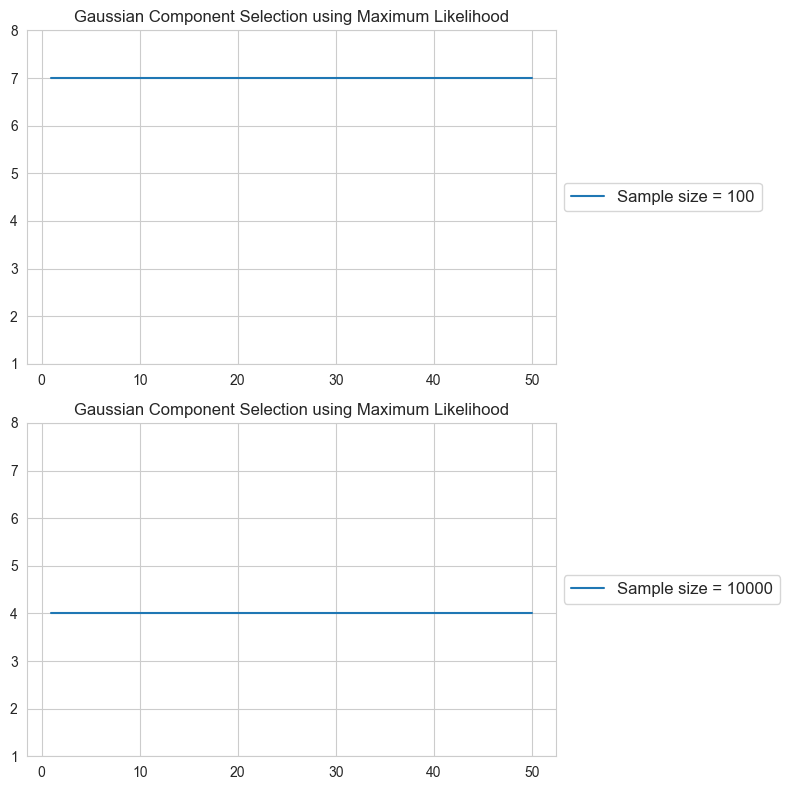

In [112]:
fig_2 = plt.figure(figsize = (8, 8))

plt.subplot(2, 1, 1)
plt.plot(np.array(range(1, 51)), best_res[0], label = 'Sample size = 100')
plt.title('Gaussian Component Selection using Maximum Likelihood')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), prop = {'size': 12})
plt.ylim([1, 8])

plt.subplot(2, 1, 2)
plt.plot(np.array(range(1, 51)), best_res[1], label = 'Sample size = 10000')
plt.title('Gaussian Component Selection using Maximum Likelihood')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), prop = {'size': 12})
plt.ylim([1, 8])

fig_2.tight_layout()
plt.show()